# Project: WeRateDogs Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#visualizing">Analyzing and Visualizing Data</a></li>
</ul>

## Introduction

 In this project, I will be analyzing the WeRateDogs which is a Twitter account that rates people's dogs with a humorous comment about the dog.Udacity downloaded its Twitter archive which contains basic data  such as tweet ID, text, timestamp etc.
 
 There is also additional data to be gathered from the twitter API through a developer's account.
 
 A neural network was developed to come up with the image predictions of the dogs based on the images of the dogs posted on the twitter archive.

## Data Wrangling

The dataset was gathered, assessed and cleaned for analysis

## Gathering Data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [4]:
import requests

In [5]:
# define url
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
# send a HTTP request to the server and save the HTTP response in a response object called r
r = requests.get(url)
# get type of data to download
print(r.headers.get('content-type'))



text/tab-separated-values; charset=utf-8


In [6]:
# save the contents and writing it in a response object called r
open ('image-predictions.tsv', 'wb').write(r.content)
    

335079

In [7]:
dfi = pd.read_csv('image-predictions.tsv', sep='\t')
dfi

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [24]:
import tweepy
from  tweepy import OAuthHandler

# Read the developer keys, secrets and tokens saved in a seperate file
import configparser
config = configparser.ConfigParser()
config.read('config.ini')

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)


In [14]:
tweet_ids = df.tweet_id.values
len(tweet_ids)

2356

In [8]:
import json
# Measures the time it takes to execute the function
from timeit import default_timer as timer

In [9]:
count = 0
fails_dict = {}
start = timer()

In [32]:
# Save each tweet's returned JSON as a new line in a .txt file by writing it
with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            # Write directly from dictionary to JSON
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
# Gets the difference which is the time taken to execute the function
print(end - start)
# Creates a dictionary with missing tweets from the corresponding tweet_id
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success


Success
776: 776201521193218049
Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807

Rate limit reached. Sleeping for: 161


Success
902: 758474966123810816
Success
903: 758467244762497024
Success
904: 758405701903519748
Success
905: 758355060040593408
Success
906: 758099635764359168
Success
907: 758041019896193024
Success
908: 757741869644341248
Success
909: 757729163776290825
Success
910: 757725642876129280
Success
911: 757611664640446465
Success
912: 757597904299253760
Success
913: 757596066325864448
Success
914: 757400162377592832
Success
915: 757393109802180609
Success
916: 757354760399941633
Success
917: 756998049151549440
Success
918: 756939218950160384
Success
919: 756651752796094464
Success
920: 756526248105566208
Success
921: 756303284449767430
Success
922: 756288534030475264
Success
923: 756275833623502848
Success
924: 755955933503782912
Success
925: 755206590534418437
Success
926: 755110668769038337
Success
927: 754874841593970688
Success
928: 754856583969079297
Success
929: 754747087846248448
Success
930: 754482103782404096
Success
931: 754449512966619136
Success
932: 754120377874386944
Success


Success
1154: 725729321944506368
Success
1155: 725458796924002305
Success
1156: 724983749226668032
Success
1157: 724771698126512129
Success
1158: 724405726123311104
Success
1159: 724049859469295616
Success
1160: 724046343203856385
Success
1161: 724004602748780546
Success
1162: 723912936180330496
Success
1163: 723688335806480385
Success
1164: 723673163800948736
Success
1165: 723179728551723008
Success
1166: 722974582966214656
Success
1167: 722613351520608256
Success
1168: 721503162398597120
Success
1169: 721001180231503872
Success
1170: 720785406564900865
Success
1171: 720775346191278080
Success
1172: 720415127506415616
Success
1173: 720389942216527872
Success
1174: 720340705894408192
Success
1175: 720059472081784833
Success
1176: 720043174954147842
Success
1177: 719991154352222208
Success
1178: 719704490224398336
Success
1179: 719551379208073216
Success
1180: 719367763014393856
Success
1181: 719339463458033665
Success
1182: 719332531645071360
Success
1183: 718971898235854848
Success
11

Success
1403: 699423671849451520
Success
1404: 699413908797464576
Success
1405: 699370870310113280
Success
1406: 699323444782047232
Success
1407: 699088579889332224
Success
1408: 699079609774645248
Success
1409: 699072405256409088
Success
1410: 699060279947165696
Success
1411: 699036661657767936
Success
1412: 698989035503689728
Success
1413: 698953797952008193
Success
1414: 698907974262222848
Success
1415: 698710712454139905
Success
1416: 698703483621523456
Success
1417: 698635131305795584
Success
1418: 698549713696649216
Success
1419: 698355670425473025
Success
1420: 698342080612007937
Success
1421: 698262614669991936
Success
1422: 698195409219559425
Success
1423: 698178924120031232
Success
1424: 697995514407682048
Success
1425: 697990423684476929
Success
1426: 697943111201378304
Success
1427: 697881462549430272
Success
1428: 697630435728322560
Success
1429: 697616773278015490
Success
1430: 697596423848730625
Success
1431: 697575480820686848
Success
1432: 697516214579523584
Success
14

Success
1652: 683498322573824003
Success
1653: 683481228088049664
Success
1654: 683462770029932544
Success
1655: 683449695444799489
Success
1656: 683391852557561860
Success
1657: 683357973142474752
Success
1658: 683142553609318400
Success
1659: 683111407806746624
Success
1660: 683098815881154561
Success
1661: 683078886620553216
Success
1662: 683030066213818368
Success
1663: 682962037429899265
Success
1664: 682808988178739200
Success
1665: 682788441537560576
Success
1666: 682750546109968385
Success
1667: 682697186228989953
Success
1668: 682662431982772225
Success
1669: 682638830361513985
Success
1670: 682429480204398592
Success
1671: 682406705142087680
Success
1672: 682393905736888321
Success
1673: 682389078323662849
Success
1674: 682303737705140231
Success
1675: 682259524040966145
Success
1676: 682242692827447297
Success
1677: 682088079302213632
Success
1678: 682059653698686977
Success
1679: 682047327939461121
Success
1680: 682032003584274432
Success
1681: 682003177596559360
Success
16

Success
1901: 674664755118911488
Success
1902: 674646392044941312
Success
1903: 674644256330530816
Success
1904: 674638615994089473
Success
1905: 674632714662858753
Success
1906: 674606911342424069
Success
1907: 674468880899788800
Success
1908: 674447403907457024
Success
1909: 674436901579923456
Success
1910: 674422304705744896
Success
1911: 674416750885273600
Success
1912: 674410619106390016
Success
1913: 674394782723014656
Success
1914: 674372068062928900
Success
1915: 674330906434379776
Success
1916: 674318007229923329
Success
1917: 674307341513269249
Success
1918: 674291837063053312
Success
1919: 674271431610523648
Success
1920: 674269164442398721
Success
1921: 674265582246694913
Success
1922: 674262580978937856
Success
1923: 674255168825880576
Success
1924: 674082852460433408
Success
1925: 674075285688614912
Success
1926: 674063288070742018
Success
1927: 674053186244734976
Success
1928: 674051556661161984
Success
1929: 674045139690631169
Success
1930: 674042553264685056
Success
19

Success
2150: 669684865554620416
Success
2151: 669683899023405056
Success
2152: 669682095984410625
Success
2153: 669680153564442624
Success
2154: 669661792646373376
Success
2155: 669625907762618368
Success
2156: 669603084620980224
Success
2157: 669597912108789760
Success
2158: 669583744538451968
Success
2159: 669573570759163904
Success
2160: 669571471778410496
Success
2161: 669567591774625800
Success
2162: 669564461267722241
Success
2163: 669393256313184256
Success
2164: 669375718304980992
Success
2165: 669371483794317312
Success
2166: 669367896104181761
Success
2167: 669363888236994561
Success
2168: 669359674819481600
Success
2169: 669354382627049472
Success
2170: 669353438988365824
Success
2171: 669351434509529089
Success
2172: 669328503091937280
Success
2173: 669327207240699904
Success
2174: 669324657376567296
Success
2175: 669216679721873412
Success
2176: 669214165781868544
Success
2177: 669203728096960512
Success
2178: 669037058363662336
Success
2179: 669015743032369152
Success
21

In [10]:
# Reads the text file line by line appending onto a new tweets list
tweets = []
for line in open('tweet_json.txt', 'r', encoding='utf-8'):
    tweets.append(json.loads(line))


In [11]:
import pandas as pd
# Creates dataframe the list of dcitionaries to use the keys as the columns
dft = pd.DataFrame.from_dict(tweets, orient='columns')
dft

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,False,False,en,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,False,False,en,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,False,False,en,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,False,False,en,NaN,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,False,False,en,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,Mon Nov 16 00:24:50 +0000 2015,666049248165822465,666049248165822465,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,111,False,False,False,False,en,NaN,NaN,NaN,NaN
2350,Mon Nov 16 00:04:52 +0000 2015,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,311,False,False,False,False,en,NaN,NaN,NaN,NaN
2351,Sun Nov 15 23:21:54 +0000 2015,666033412701032449,666033412701032449,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,128,False,False,False,False,en,NaN,NaN,NaN,NaN
2352,Sun Nov 15 23:05:30 +0000 2015,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,132,False,False,False,False,en,NaN,NaN,NaN,NaN


In [12]:
list(dft)

['created_at',
 'id',
 'id_str',
 'full_text',
 'truncated',
 'display_text_range',
 'entities',
 'extended_entities',
 'source',
 'in_reply_to_status_id',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id',
 'in_reply_to_user_id_str',
 'in_reply_to_screen_name',
 'user',
 'geo',
 'coordinates',
 'place',
 'contributors',
 'is_quote_status',
 'retweet_count',
 'favorite_count',
 'favorited',
 'retweeted',
 'possibly_sensitive',
 'possibly_sensitive_appealable',
 'lang',
 'retweeted_status',
 'quoted_status_id',
 'quoted_status_id_str',
 'quoted_status']

In [13]:
# Creates a dataframe from the required columns
df2 = dft[['id', 'retweet_count', 'favorite_count', 'retweeted']]
df2

,id,retweet_count,favorite_count,retweeted
0,892420643555336193,8853,39467,False
1,892177421306343426,6514,33819,False
2,891815181378084864,4328,25461,False
3,891689557279858688,8964,42908,False
4,891327558926688256,9774,41048,False
...,...,...,...,...
2349,666049248165822465,41,111,False
2350,666044226329800704,147,311,False
2351,666033412701032449,47,128,False
2352,666029285002620928,48,132,False


In [14]:
# Save to csv
df2.to_csv('tweets.csv', encoding = 'utf-8', index = False)

## Gather Data

In [15]:
import pandas as pd

In [16]:
twitter_arch = pd.read_csv('twitter-archive-enhanced.csv')
image_pred = pd.read_csv('image-predictions.tsv', sep='\t')
tweets = pd.read_csv('tweets.csv')

## Assessing Data
### Visual assessment

In [17]:
twitter_arch

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [18]:
image_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [19]:
tweets

,id,retweet_count,favorite_count,retweeted
0,892420643555336193,8853,39467,False
1,892177421306343426,6514,33819,False
2,891815181378084864,4328,25461,False
3,891689557279858688,8964,42908,False
4,891327558926688256,9774,41048,False
...,...,...,...,...
2349,666049248165822465,41,111,False
2350,666044226329800704,147,311,False
2351,666033412701032449,47,128,False
2352,666029285002620928,48,132,False


### Programmatic assesment

In [20]:
twitter_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [21]:
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [22]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
 3   retweeted       2354 non-null   bool 
dtypes: bool(1), int64(3)
memory usage: 57.6 KB


In [23]:
twitter_arch.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [24]:
image_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [25]:
tweets.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [26]:
twitter_arch.name.nunique()

957

In [27]:
twitter_arch.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [28]:
twitter_arch[twitter_arch.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [29]:
twitter_arch.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2194,668892474547511297,NaN,NaN,2015-11-23 20:42:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ruffles. He is an Albanian Shoop Da Wh...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668892474...,11,10,Ruffles,None,None,None,None
1936,673956914389192708,NaN,NaN,2015-12-07 20:07:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is one esteemed pupper. Just graduated co...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673956914...,10,10,one,None,None,pupper,None
878,760656994973933572,NaN,NaN,2016-08-03 02:02:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rose. Her face is stuck like that. 11/...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/760656994...,11,10,Rose,None,None,None,None
2261,667549055577362432,NaN,NaN,2015-11-20 03:44:31 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Never seen dog like this. Breathes heavy. Tilt...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667549055...,1,10,None,None,None,None,None
686,788070120937619456,NaN,NaN,2016-10-17 17:32:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bo and Ty. Bo eats pape...,7.610045e+17,4.196984e+09,2016-08-04 01:03:17 +0000,https://twitter.com/dog_rates/status/761004547...,11,10,Bo,None,None,None,None


In [30]:
twitter_arch.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [31]:
# Inspect if rating is what is written in text for rating numerator > 200

print(twitter_arch.query('rating_numerator == 1776')['text'])
print(twitter_arch.query('rating_numerator == 960')['text'])
print(twitter_arch.query('rating_numerator == 666')['text'])
print(twitter_arch.query('rating_numerator == 420')['text'])
print(twitter_arch.query('rating_numerator == 204')['text'])


979    This is Atticus. He's quite simply America af....
Name: text, dtype: object
313    @jonnysun @Lin_Manuel ok jomny I know you're e...
Name: text, dtype: object
189    @s8n You tried very hard to portray this good ...
Name: text, dtype: object
188     @dhmontgomery We also gave snoop dogg a 420/10...
2074    After so many requests... here you go.\n\nGood...
Name: text, dtype: object
1120    Say hello to this unbelievably well behaved sq...
Name: text, dtype: object


In [32]:
# To get the full text where rating numerator and denominator is extracted for those indexes

# Valid
print(twitter_arch['text'][979]) 
# not valid -delete
print(twitter_arch['text'][313])
# Valid
print(twitter_arch['text'][189]) 
# Not an actual dog - delete
print(twitter_arch['text'][188])
# Valid
print(twitter_arch['text'][2074])
# Valid
print(twitter_arch['text'][1120]) 

This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh
@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10
@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research
After so many requests... here you go.

Good dogg. 420/10 https://t.co/yfAAo1gdeY
Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv


In [33]:
twitter_arch.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [34]:
# Inspect text for possible rating denominator outliers

print(twitter_arch.query('rating_denominator == 11')['text'])
print(twitter_arch.query('rating_denominator == 70')['text'])
print(twitter_arch.query('rating_denominator == 5')['text'])
print(twitter_arch.query('rating_denominator == 150')['text'])
print(twitter_arch.query('rating_denominator == 0')['text'])
print(twitter_arch.query('rating_denominator == 16')['text'])
print(twitter_arch.query('rating_denominator == 120')['text'])
print(twitter_arch.query('rating_denominator == 2')['text'])
print(twitter_arch.query('rating_denominator == 7')['text'])



784     RT @dog_rates: After so many requests, this is...
1068    After so many requests, this is Bretagne. She ...
1662    This is Darrel. He just robbed a 7/11 and is i...
Name: text, dtype: object
433    The floofs have been released I repeat the flo...
Name: text, dtype: object
Series([], Name: text, dtype: object)
902    Why does this never happen at my front door......
Name: text, dtype: object
313    @jonnysun @Lin_Manuel ok jomny I know you're e...
Name: text, dtype: object
1663    I'm aware that I could've said 20/16, but here...
Name: text, dtype: object
1779    IT'S PUPPERGEDDON. Total of 144/120 ...I think...
Name: text, dtype: object
2335    This is an Albanian 3 1/2 legged  Episcopalian...
Name: text, dtype: object
516    Meet Sam. She smiles 24/7 &amp; secretly aspir...
Name: text, dtype: object


In [35]:
# Get full text to determine the rating denominator and numerator for those indexes

# actual rating is 14/10 to be ignored
print(twitter_arch['text'][784]) 
# this is a retweet - delete
print(twitter_arch['text'][1068])
# actual rating is 10/10 to be ignored
print(twitter_arch['text'][1662]) 
# Valid 7 dogs
print(twitter_arch['text'][433])
# Valid has 15 dogs
print(twitter_arch['text'][902])
# explanation tweet - delete
print(twitter_arch['text'][1663]) 
# Valid has 12 dogs
print(twitter_arch['text'][1779])
# actual rating 9/10 to be ignored
print(twitter_arch['text'][2335])
# Not a rating - delete
print(twitter_arch['text'][516])



RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…
After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5
The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
I'm aware that I could've said 20/16, but here at WeRateDogs we are very professional. An inconsistent rating scale is simply irresponsible
IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq
This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv
Meet Sam. She smiles 24/7 &amp; secretly aspires to

In [36]:
image_pred.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
892,699413908797464576,https://pbs.twimg.com/media/CbTRPXdW8AQMZf7.jpg,1,Samoyed,0.517479,True,malamute,0.155935,True,Eskimo_dog,0.095001,True
1637,806542213899489280,https://pbs.twimg.com/media/CzFp3FNW8AAfvV8.jpg,1,vizsla,0.938617,True,Brittany_spaniel,0.036739,True,Chesapeake_Bay_retriever,0.003971,True
1112,724049859469295616,https://pbs.twimg.com/media/CgxXf1TWYAEjY61.jpg,1,Border_collie,0.581835,True,collie,0.344588,True,Shetland_sheepdog,0.043584,True
1974,869772420881756160,https://pbs.twimg.com/media/DBINZcxXgAQ-R6P.jpg,1,Pembroke,0.980148,True,Cardigan,0.019271,True,malamute,0.000136,True
584,678969228704284672,https://pbs.twimg.com/media/CWwu6OLUkAEo3gq.jpg,1,Labrador_retriever,0.680251,True,Chesapeake_Bay_retriever,0.201697,True,golden_retriever,0.019676,True


In [37]:
image_pred.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
pillow                  1
carousel                1
bald_eagle              1
lorikeet                1
orange                  1
Name: p1, Length: 378, dtype: int64

In [38]:
image_pred.p2.value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
medicine_chest          1
quail                   1
horse_cart              1
waffle_iron             1
bagel                   1
Name: p2, Length: 405, dtype: int64

In [39]:
image_pred.p3.value_counts()

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
ox                     1
assault_rifle          1
axolotl                1
pot                    1
banana                 1
Name: p3, Length: 408, dtype: int64

In [40]:
# Tweets are original ones and not retweets 
tweets.query('retweeted == "true"')

,id,retweet_count,favorite_count,retweeted


### Quality
#### `twitter_arch` table
- Delete all retweets
- Missing values in columns like in_reply_to_staus_id et. al
- Misspelling of dog stage 'floofer' as per dogtionary
- Default lowercase dog names like 'a', 'just' etc. for dog name that follows is despite them being inexistent
- Inaccurate rating_numerator whose outlying value not valid: index: 313, 188
- Rating_denominator contains sample outliers index: 516, 1068, 1663
- Calculate rating from the rating numerator and rating denominator for standardization

#### `image_pred` table
- Create a column for dog breeds based on the predictions

#### `tweets` table
- id instead of tweet_id for consistency
- All tweet_id should be in string type to avoid losing accuracy as per Twiiter API doc

### Tidiness
- The dog stage in `twitter_arch` is one variable and hence should form single column and should not spread across 4 columns - doggo, floofer, pupper, puppo.
- Retweet count and favorite count should be part of the `twitter_arch` and `image_pred` tables together


## Cleaning Data

In [41]:
twitter_arch_clean = twitter_arch.copy()
image_pred_clean = image_pred.copy()
tweets_clean = tweets.copy()

### Quality

#### `twitter_arch`: Delete retweets

##### Define
- Select all the rows containing the null values with no retweets to automatically remove the ones with non null values

##### Code

In [42]:
twitter_arch_clean = twitter_arch_clean[twitter_arch_clean.retweeted_status_id.isnull()]
twitter_arch_clean = twitter_arch_clean[twitter_arch_clean.retweeted_status_user_id.isnull()]
twitter_arch_clean = twitter_arch_clean[twitter_arch_clean.retweeted_status_timestamp.isnull()]

##### Test

In [43]:
# Verify no null values left
twitter_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

#### Missing values

##### Define
- Drop the column with the null values because they are not relevant for the analysis

##### Code

In [44]:
# Drop index columns 1, 2, 6, 7, 8 and 9

ta_clean = twitter_arch_clean.drop(["in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp", "expanded_urls"], axis = 1 )
ta_clean = ta_clean.reset_index(drop = True)

##### Test

In [45]:
# Table with dropped columns containing null values
ta_clean

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...
2170,666049248165822465,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,5,10,None,None,None,None,None
2171,666044226329800704,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,6,10,a,None,None,None,None
2172,666033412701032449,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,9,10,a,None,None,None,None
2173,666029285002620928,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,7,10,a,None,None,None,None


In [46]:
ta_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   rating_numerator    2175 non-null   int64 
 5   rating_denominator  2175 non-null   int64 
 6   name                2175 non-null   object
 7   doggo               2175 non-null   object
 8   floofer             2175 non-null   object
 9   pupper              2175 non-null   object
 10  puppo               2175 non-null   object
dtypes: int64(3), object(8)
memory usage: 187.0+ KB


####  Default lowercase dog names like 'a', 'just' etc. for dog name that follows "is" despite them being inexistent

##### Define
- Replace all with NaN to show nonexistent name

##### Code

In [47]:
import numpy as np

# Beacuse all non-names are in lowercase and not in title case, they are flagged as null
mask = ta_clean.name.str.islower() 
column_name = 'name' 
ta_clean.loc[mask, column_name] = np.nan

In [48]:
ta_clean['name'] = ta_clean.name.replace('None', np.nan)

##### Test

In [49]:
ta_clean.name.value_counts()

Charlie       11
Lucy          11
Cooper        10
Oliver        10
Penny          9
              ..
Shiloh         1
Gustav         1
Arlen          1
Lenox          1
Christoper     1
Name: name, Length: 930, dtype: int64

In [50]:
ta_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   rating_numerator    2175 non-null   int64 
 5   rating_denominator  2175 non-null   int64 
 6   name                1391 non-null   object
 7   doggo               2175 non-null   object
 8   floofer             2175 non-null   object
 9   pupper              2175 non-null   object
 10  puppo               2175 non-null   object
dtypes: int64(3), object(8)
memory usage: 187.0+ KB


#### 'floofer' instead of 'floof' as per the dogtionary

##### Define
- Correct the column name spelling

##### Code

In [51]:
ta_clean = ta_clean.rename(columns={"floofer" : "floof"})

##### Test

In [52]:
ta_clean.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floof,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None


### Tidiness

#### `twitter_arch`:  Get one column for the dog stages

##### Define
- Extract either of the four dog stages from the whole tweet text 
- Create a new column where the data wil be inputed

##### Code

In [53]:
# | represents bitwise opertaor OR
ta_clean['dog_stage'] = ta_clean['text'].str.extract('(doggo|floof|pupper|puppo)')

##### Test`

In [54]:
ta_clean.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floof,pupper,puppo,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None,NaN


In [55]:
ta_clean.dog_stage.value_counts()

pupper    244
doggo      84
puppo      32
floof      23
Name: dog_stage, dtype: int64

In [56]:
list(ta_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floof',
 'pupper',
 'puppo',
 'dog_stage']

#### Presence of irrelevant columns for analysis

##### Define
- Drop the columns

##### Code

In [57]:
twitter_archive_clean = ta_clean.drop(["source", "doggo", "floof", "pupper", "puppo"], axis = 1)

##### Test

In [58]:
twitter_archive_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN


### Quality

####  `twitter_arch`: Inaccurate rating_numerator whose outlying values are not valid: index: 313, 188

##### Define
- Drop the rows

##### Code

In [59]:
twitter_archive_clean = twitter_archive_clean.drop(index=[188, 313])
twitter_archive_clean.reset_index(drop=True)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN
...,...,...,...,...,...,...,...
2168,666049248165822465,2015-11-16 00:24:50 +0000,Here we have a 1949 1st generation vulpix. Enj...,5,10,NaN,NaN
2169,666044226329800704,2015-11-16 00:04:52 +0000,This is a purebred Piers Morgan. Loves to Netf...,6,10,NaN,NaN
2170,666033412701032449,2015-11-15 23:21:54 +0000,Here is a very happy pup. Big fan of well-main...,9,10,NaN,NaN
2171,666029285002620928,2015-11-15 23:05:30 +0000,This is a western brown Mitsubishi terrier. Up...,7,10,NaN,NaN


##### Test

In [60]:
twitter_archive_clean.shape

(2173, 7)

####  Rating_denominator contains sample outliers index: 516, 1068, 1663

##### Define
- Drop the rows

##### Code

In [61]:
twitter_archive_clean = twitter_archive_clean.drop(index=[516, 1068, 1663])
twitter_archive_clean = twitter_archive_clean.reset_index(drop=True)

##### Test

In [62]:
twitter_archive_clean.shape

(2170, 7)

In [63]:
twitter_archive_clean

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN
...,...,...,...,...,...,...,...
2165,666049248165822465,2015-11-16 00:24:50 +0000,Here we have a 1949 1st generation vulpix. Enj...,5,10,NaN,NaN
2166,666044226329800704,2015-11-16 00:04:52 +0000,This is a purebred Piers Morgan. Loves to Netf...,6,10,NaN,NaN
2167,666033412701032449,2015-11-15 23:21:54 +0000,Here is a very happy pup. Big fan of well-main...,9,10,NaN,NaN
2168,666029285002620928,2015-11-15 23:05:30 +0000,This is a western brown Mitsubishi terrier. Up...,7,10,NaN,NaN


#### Create rating from the rating numerator and rating denominator for standardization

##### Define
- Divide the rating numerator by rating denominator to get the rating

##### Code

In [64]:
twitter_archive_clean['rating'] = twitter_archive_clean['rating_numerator'] / twitter_archive_clean['rating_denominator']

##### Test

In [65]:
twitter_archive_clean.rating

0       1.3
1       1.3
2       1.2
3       1.3
4       1.2
       ... 
2165    0.5
2166    0.6
2167    0.9
2168    0.7
2169    0.8
Name: rating, Length: 2170, dtype: float64

In [66]:
twitter_archive_clean.sample(10)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,rating
23,887343217045368832,2017-07-18 16:08:03 +0000,You may not have known you needed to see this ...,13,10,NaN,NaN,1.3
1741,674063288070742018,2015-12-08 03:09:46 +0000,This is Earl. Earl is lost. Someone help Earl....,5,10,Earl,NaN,0.5
681,766313316352462849,2016-08-18 16:38:26 +0000,This is Oscar. He has legendary eyebrows and h...,12,10,Oscar,NaN,1.2
1176,703356393781329922,2016-02-26 23:10:06 +0000,This is Socks. That water pup w the super legs...,9,10,Socks,NaN,0.9
1822,672267570918129665,2015-12-03 04:14:13 +0000,When you accidentally open up the front facing...,10,10,NaN,NaN,1.0
858,744334592493166593,2016-06-19 01:02:50 +0000,This is Blanket. She has overthrown her human....,11,10,Blanket,NaN,1.1
1371,688898160958271489,2016-01-18 01:38:15 +0000,When you have a ton of work to do but then rem...,10,10,NaN,NaN,1.0
953,728653952833728512,2016-05-06 18:33:34 +0000,This is Coleman. Somebody needs to tell him th...,8,10,Coleman,NaN,0.8
1377,688519176466644993,2016-01-17 00:32:18 +0000,This pupper is sprouting a flower out of her h...,12,10,NaN,pupper,1.2
1996,669000397445533696,2015-11-24 03:51:38 +0000,Meet Terrance. He's being yelled at because he...,11,10,Terrance,NaN,1.1


#### `image_pred`: Create a column for dog breeds based on the predictions

##### Define
- Pass a function to iterate through the columns to create a new dog breed column

##### Code

In [67]:
# Call a function line by line until a data is retrieved
def categorise(row):  
    if row['p1_conf'] > 0 and row['p1_dog'] == True:
        return row['p1']
    elif row['p2_conf'] > 0 and row['p2_dog'] == True:
        return row['p2']
    elif row['p3_conf'] > 0  and row['p3_dog'] == True:
        return row['p3']
    return 'None'
    

In [68]:
# Use apply function to compute the values in a new column
image_pred_clean['dog_breed'] = image_pred_clean.apply(lambda row: categorise(row), axis=1)

##### Test

In [69]:
image_pred_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,miniature_pinscher


In [70]:
image_pred_clean.dog_breed.value_counts()

None                    324
golden_retriever        173
Labrador_retriever      113
Pembroke                 96
Chihuahua                95
                       ... 
Scotch_terrier            1
EntleBucher               1
Japanese_spaniel          1
standard_schnauzer        1
Bouvier_des_Flandres      1
Name: dog_breed, Length: 114, dtype: int64

#### `tweets`: Inconsistent column name for id

#####  Define

- Correct the column name

##### Code

In [71]:
tweets_clean = tweets_clean.rename(columns={"id" : "tweet_id"})

##### Test

In [72]:
tweets_clean

,tweet_id,retweet_count,favorite_count,retweeted
0,892420643555336193,8853,39467,False
1,892177421306343426,6514,33819,False
2,891815181378084864,4328,25461,False
3,891689557279858688,8964,42908,False
4,891327558926688256,9774,41048,False
...,...,...,...,...
2349,666049248165822465,41,111,False
2350,666044226329800704,147,311,False
2351,666033412701032449,47,128,False
2352,666029285002620928,48,132,False


### Tidiness

#### Retweet count and favorite count should be part of the twitter_arch and image_pred tables together

##### Define
- Merge all three tables together based on the tweet id to also avoid repetitiveness

##### Code

In [76]:
df = pd.merge(twitter_archive_clean, tweets_clean, on='tweet_id')
df = pd.merge(df, image_pred_clean, on='tweet_id')

##### Test

In [77]:
df

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,rating,retweet_count,favorite_count,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_breed
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,1.3,8853,39467,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,None
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,1.3,6514,33819,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,Chihuahua
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,1.2,4328,25461,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,Chihuahua
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN,1.3,8964,42908,...,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,Labrador_retriever
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN,1.2,9774,41048,...,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,basset
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1984,666049248165822465,2015-11-16 00:24:50 +0000,Here we have a 1949 1st generation vulpix. Enj...,5,10,NaN,NaN,0.5,41,111,...,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,miniature_pinscher
1985,666044226329800704,2015-11-16 00:04:52 +0000,This is a purebred Piers Morgan. Loves to Netf...,6,10,NaN,NaN,0.6,147,311,...,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_ridgeback
1986,666033412701032449,2015-11-15 23:21:54 +0000,Here is a very happy pup. Big fan of well-main...,9,10,NaN,NaN,0.9,47,128,...,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_shepherd
1987,666029285002620928,2015-11-15 23:05:30 +0000,This is a western brown Mitsubishi terrier. Up...,7,10,NaN,NaN,0.7,48,132,...,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone


### Quality

#### `df`: Tweet_id should be in string format

##### Define
- Convert to string format

##### Code

In [78]:
df['tweet_id'] = df.tweet_id.astype(str)

##### Test

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1989 entries, 0 to 1988
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1989 non-null   object 
 1   timestamp           1989 non-null   object 
 2   text                1989 non-null   object 
 3   rating_numerator    1989 non-null   int64  
 4   rating_denominator  1989 non-null   int64  
 5   name                1346 non-null   object 
 6   dog_stage           344 non-null    object 
 7   rating              1989 non-null   float64
 8   retweet_count       1989 non-null   int64  
 9   favorite_count      1989 non-null   int64  
 10  retweeted           1989 non-null   bool   
 11  jpg_url             1989 non-null   object 
 12  img_num             1989 non-null   int64  
 13  p1                  1989 non-null   object 
 14  p1_conf             1989 non-null   float64
 15  p1_dog              1989 non-null   bool   
 16  p2    

#### For the forthcoming visulization, I split the timestamp column into the date and time columns for easier manipulation

In [80]:
df['date'] = pd.to_datetime(df['timestamp']).dt.date
df['time'] = pd.to_datetime(df['timestamp']).dt.time

In [81]:
df.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,rating,retweet_count,favorite_count,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_breed,date,time
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,1.3,8853,39467,...,False,bagel,0.085851,False,banana,0.076110,False,None,2017-08-01,16:23:56
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,1.3,6514,33819,...,True,Pekinese,0.090647,True,papillon,0.068957,True,Chihuahua,2017-08-01,00:17:27
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,1.2,4328,25461,...,True,malamute,0.078253,True,kelpie,0.031379,True,Chihuahua,2017-07-31,00:18:03
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN,1.3,8964,42908,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,Labrador_retriever,2017-07-30,15:58:51
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN,1.2,9774,41048,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,basset,2017-07-29,16:00:24


In [82]:
# Drop the timestamp column
df = df.drop("timestamp", axis = 1)
# Remove the column
date = df.pop('date')
time = df.pop('time') 

# insert column using insert(position,column_name, column) function
df.insert(1, 'date', date)
df.insert(2, 'time', time)
df

,tweet_id,date,time,text,rating_numerator,rating_denominator,name,dog_stage,rating,retweet_count,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_breed
0,892420643555336193,2017-08-01,16:23:56,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,1.3,8853,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,None
1,892177421306343426,2017-08-01,00:17:27,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,1.3,6514,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,Chihuahua
2,891815181378084864,2017-07-31,00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,1.2,4328,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,Chihuahua
3,891689557279858688,2017-07-30,15:58:51,This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN,1.3,8964,...,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,Labrador_retriever
4,891327558926688256,2017-07-29,16:00:24,This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN,1.2,9774,...,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,basset
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1984,666049248165822465,2015-11-16,00:24:50,Here we have a 1949 1st generation vulpix. Enj...,5,10,NaN,NaN,0.5,41,...,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,miniature_pinscher
1985,666044226329800704,2015-11-16,00:04:52,This is a purebred Piers Morgan. Loves to Netf...,6,10,NaN,NaN,0.6,147,...,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_ridgeback
1986,666033412701032449,2015-11-15,23:21:54,Here is a very happy pup. Big fan of well-main...,9,10,NaN,NaN,0.9,47,...,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_shepherd
1987,666029285002620928,2015-11-15,23:05:30,This is a western brown Mitsubishi terrier. Up...,7,10,NaN,NaN,0.7,48,...,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone


## Store Data

In [83]:
df.to_csv('twitter_archive_master.csv', encoding = 'utf-8', index = False)

## Analyzing and Visualizing Data

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [85]:
df = pd.read_csv('twitter_archive_master.csv')

### What is the relationship between the retweet counts and the number of likes per tweet?

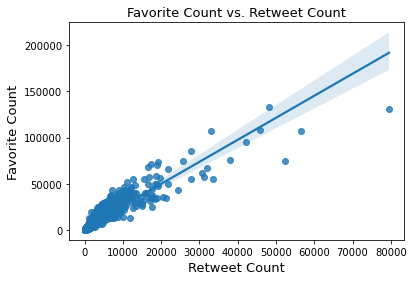

In [86]:
# Plot a scatter plot with a trendline
sns.regplot(x="retweet_count", 
           y="favorite_count", 
           data=df);

plt.title('Favorite Count vs. Retweet Count', fontsize = 13);
plt.xlabel('Retweet Count', fontsize = 13);
plt.ylabel('Favorite Count', fontsize = 13);

There was a positive correlation between retweet counts and likes per post.

### What are the most popular dog breeds?

In [87]:
df['dog_breed'].value_counts()

None                       307
golden_retriever           157
Labrador_retriever         108
Pembroke                    95
Chihuahua                   91
                          ... 
Scotch_terrier               1
wire-haired_fox_terrier      1
silky_terrier                1
clumber                      1
Irish_wolfhound              1
Name: dog_breed, Length: 114, dtype: int64

In [88]:
df['dog_breed'].value_counts().mean()

17.44736842105263

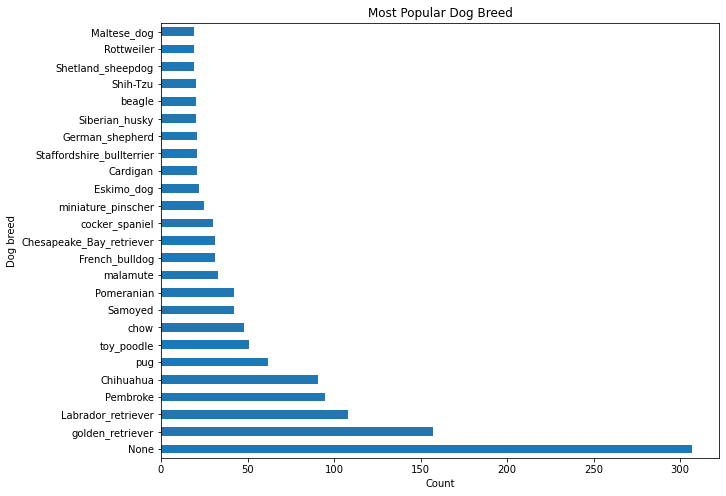

In [89]:
# Filter the most popular which are those above average
dog_breed = df.groupby('dog_breed').filter(lambda x: len(x) > 18)
    
dog_breed['dog_breed'].value_counts().plot(kind = 'barh', figsize=(10, 8))
plt.xlabel('Count')
plt.ylabel('Dog breed')
plt.title('Most Popular Dog Breed');

The Golden Retriever is the most popular breed of dog.

### How does the average rating compare to the different dog breeds?

In [90]:
df.groupby('dog_breed')['rating'].mean().max()

2.7

In [91]:
av_rating = df.groupby('dog_breed')['rating'].mean()
av_rating

dog_breed
Afghan_hound                      0.966667
Airedale                          0.983333
American_Staffordshire_terrier    1.031250
Appenzeller                       1.100000
Australian_terrier                1.150000
                                    ...   
toy_poodle                        1.103922
toy_terrier                       1.033333
vizsla                            1.084615
whippet                           1.018182
wire-haired_fox_terrier           1.200000
Name: rating, Length: 114, dtype: float64

In [92]:
# Define chart to plot line chart

def chart(Dataframe, x_values, x_label, y_values, y_label, title, colour):
    Dataframe.plot(x=x_values, y=y_values, color=colour, figsize=(10,8), grid=True)
    plt.xlabel(x_label, fontsize = 13)
    plt.ylabel(y_label, fontsize = 13)
    plt.title(title, fontsize = 13)
    plt.show();

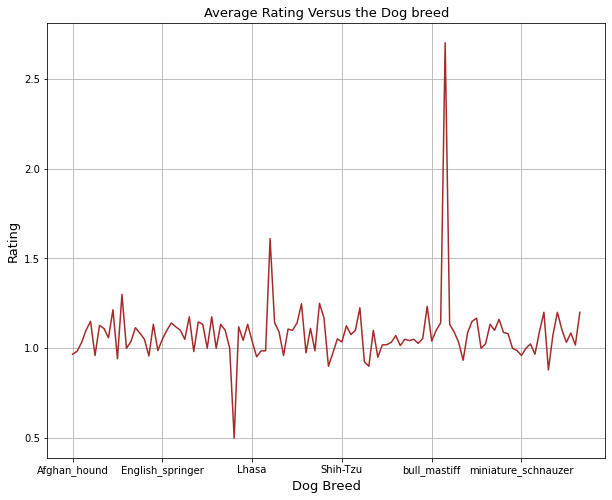

In [93]:
chart(av_rating, 'dog_breed', 'Dog Breed', 'rating', 'Rating', 'Average Rating Versus the Dog breed', 'brown');

The average rating for most dog breeds is within range of above 1.0 per breed.

### What is the most popular dog stage?

In [94]:
df.dog_stage.value_counts()

pupper    223
doggo      71
puppo      28
floof      22
Name: dog_stage, dtype: int64

In [95]:
df_dog_stage = df['dog_stage'].value_counts().sort_values(ascending = True)

In [96]:
def barChart(Dataframe, x_label, y_label, title, size):
    Dataframe.plot.bar(figsize=size)
    plt.xlabel(x_label, fontsize = 13)
    plt.ylabel(y_label, fontsize = 13)
    plt.title(title, fontsize = 13)
    plt.show()

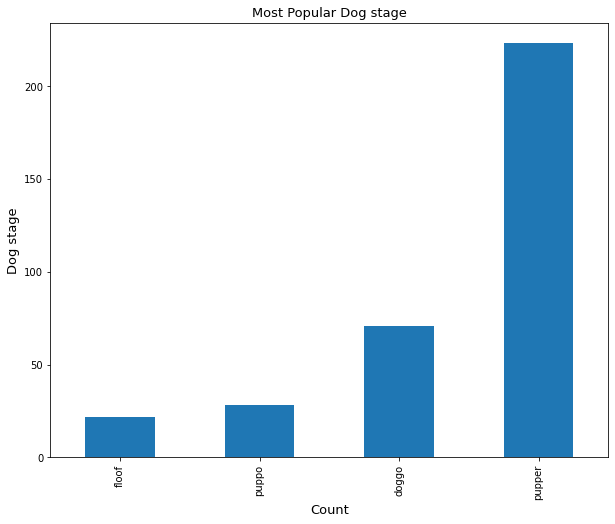

In [97]:
barChart(df_dog_stage, 'Count', 'Dog stage', 'Most Popular Dog stage', (10, 8));

The pupper which is younger than a doggo was the most popular dog stage.

### How has WeRateDogs retweet content changed over time?

In [98]:
df['date'] = pd.to_datetime(df['date'])

In [99]:
# frequency is set as month
df['MonthYear'] = df['date'].dt.to_period('M')
df.MonthYear.sample(5)

1405    2015-12
1779    2015-11
1366    2015-12
1756    2015-11
928     2016-03
Name: MonthYear, dtype: period[M]

In [100]:
# Get number of tweets per month-year
retweets = df.groupby('MonthYear')['retweet_count'].count()

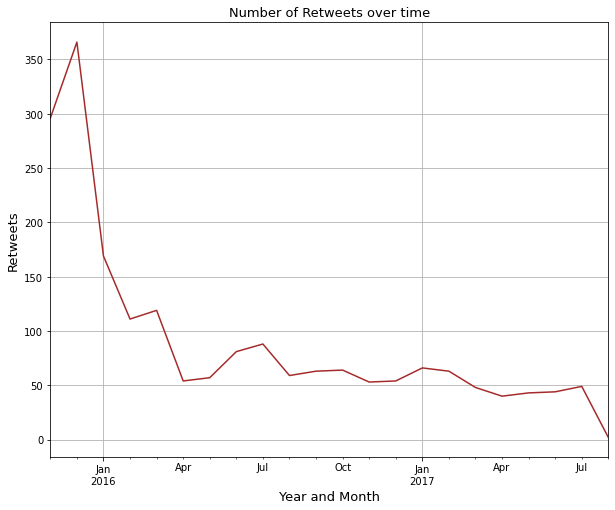

In [101]:
chart(retweets, 'MonthYear', 'Year and Month', 'retweet_count', 'Retweets', 'Number of Retweets over time', 'brown');


A sharp decrease in retweets was observed from December 2015 up until February 2016. Afterwards, there was a steady decline in user engagement with the content over the year 2016 till August 2017. 